<h1>Brief IMDB<h1>

<h2>Auteurs : Kévin Heugas & Thierry Massart<h2>

<h2>Date : 04/2024 (S15)<h2>

[Lien vers Simplonline : Prédiction de note IMDB de film](https://simplonline.co/briefs/53911d01-6ba4-4ad6-90e0-daf34da67ec2)

<h3>1. Importation, exploration/analyse et nettoyage du DataSet<h3>

<h4>1.1. Importation<h4>

In [52]:
# Importation des librairies python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [53]:
# Chargement des données IMDB
df = pd.read_csv("5000_movies_bis.csv")

<h4>1.2. Exploration/analyse<h4>

In [54]:
# Affichage des premières lignes du DataFrame pour comprendre sa structure
pd.set_option('display.max_columns', None)
df.head()

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_fb_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [55]:
# Dimensions du DataFrame
df.shape

(5043, 28)

In [56]:
# Inspection plus en détail pour certaines colonnes : 'language' et 'content_rating'
df['content_rating'].unique()

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [57]:
df['language'].unique()

array(['English', nan, 'Japanese', 'French', 'Mandarin', 'Aboriginal',
       'Spanish', 'Filipino', 'Hindi', 'Russian', 'Maya', 'Kazakh',
       'Telugu', 'Cantonese', 'Icelandic', 'German', 'Aramaic', 'Italian',
       'Dutch', 'Dari', 'Hebrew', 'Chinese', 'Mongolian', 'Swedish',
       'Korean', 'Thai', 'Polish', 'Bosnian', 'Hungarian', 'Portuguese',
       'Danish', 'Arabic', 'Norwegian', 'Czech', 'Kannada', 'Zulu',
       'Panjabi', 'Tamil', 'Dzongkha', 'Vietnamese', 'Indonesian', 'Urdu',
       'Romanian', 'Persian', 'Slovenian', 'Greek', 'Swahili'],
      dtype=object)

In [58]:
df['language'].value_counts()

language
English       4704
French          73
Spanish         40
Hindi           28
Mandarin        26
German          19
Japanese        18
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Icelandic        2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Dari             2
Panjabi          1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Urdu             1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: count, dtype: int64

In [59]:
# Vérification des informations sur les colonnes et les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   5024 non-null   object 
 1   director_name           4939 non-null   object 
 2   num_critic_for_reviews  4993 non-null   float64
 3   duration                5028 non-null   float64
 4   director_fb_likes       4939 non-null   float64
 5   actor_3_fb_likes        5020 non-null   float64
 6   actor_2_name            5030 non-null   object 
 7   actor_1_fb_likes        5036 non-null   float64
 8   gross                   4366 non-null   float64
 9   genres                  5043 non-null   object 
 10  actor_1_name            5036 non-null   object 
 11  movie_title             5043 non-null   object 
 12  num_voted_users         5043 non-null   int64  
 13  cast_total_fb_likes     5043 non-null   int64  
 14  actor_3_name            5020 non-null   

In [60]:
# Vérification des statistiques descriptives pour les colonnes numériques
df.describe()

,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_1_fb_likes,gross,num_voted_users,cast_total_fb_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_fb_likes,imdb_score,aspect_ratio,movie_fb_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.366000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.637000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.672094e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.938928e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.736555e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.042473e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,4.587414e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.400416e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,5.954872e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.300000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [61]:
# Identification des valeurs manquantes
df.isnull().sum()

color                      19
director_name             104
num_critic_for_reviews     50
duration                   15
director_fb_likes         104
actor_3_fb_likes           23
actor_2_name               13
actor_1_fb_likes            7
gross                     677
genres                      0
actor_1_name                7
movie_title                 0
num_voted_users             0
cast_total_fb_likes         0
actor_3_name               23
facenumber_in_poster       13
plot_keywords             153
movie_imdb_link             0
num_user_for_reviews       21
language                   14
country                     5
content_rating            303
budget                    406
title_year                108
actor_2_fb_likes           13
imdb_score                  0
aspect_ratio              329
movie_fb_likes              0
dtype: int64

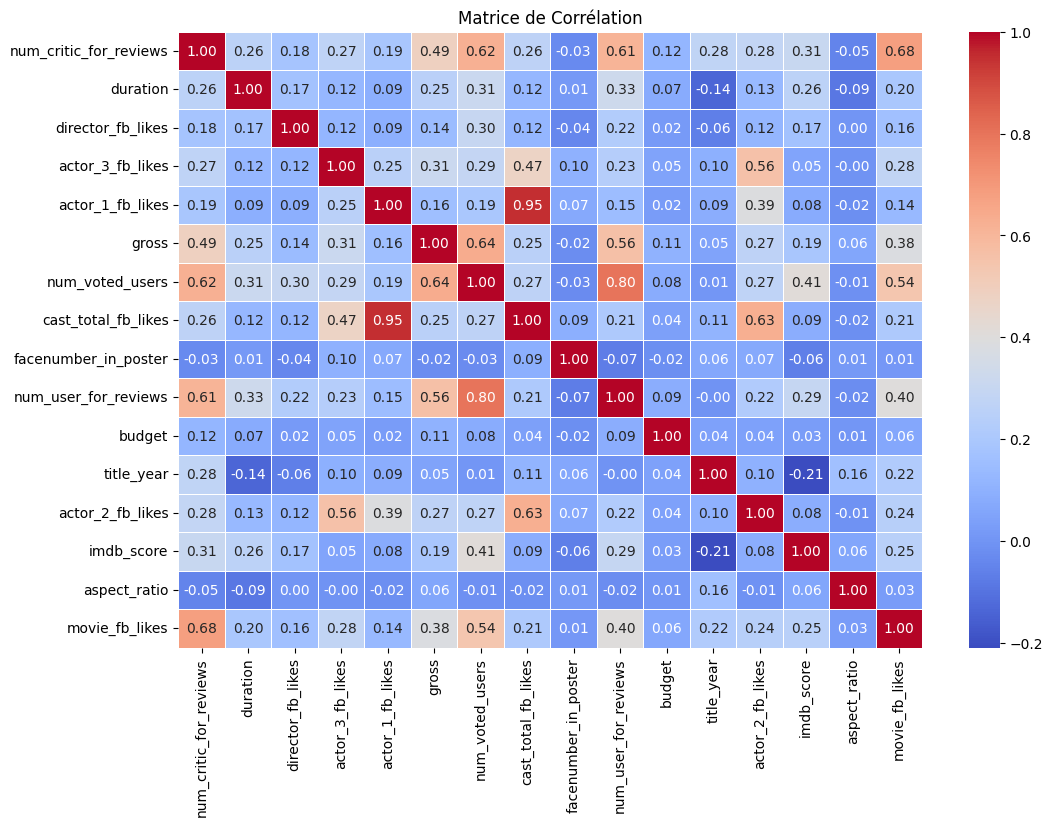

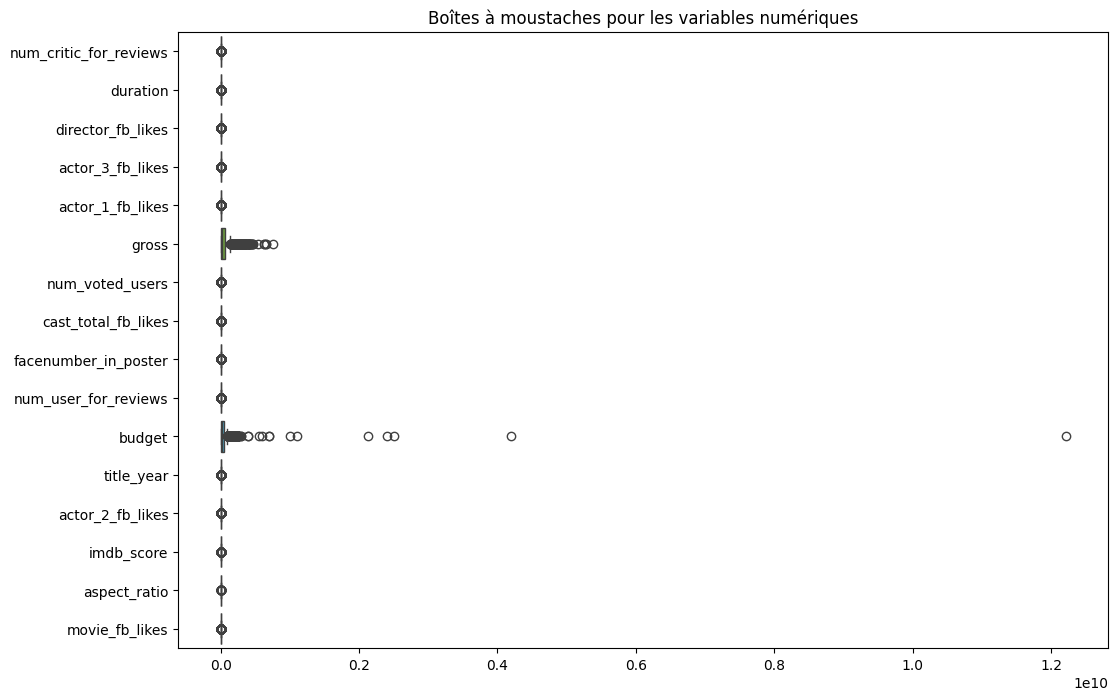

In [62]:
# Exclusion des colonnes non numériques
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcul de la matrice de corrélation
correlation_matrix = numeric_df.corr()

# Affichage du heatmap de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()

# Traçage des boxplots pour chaque variable numérique
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_df, orient="h")
plt.title('Boîtes à moustaches pour les variables numériques')
plt.show()

<h4>1.3. Nettoyage<h4>

In [63]:
# Copie du DataFrame d'origine dans un nouveau DataFrame 'df_cleaned'
df_cleaned = df.copy()

In [64]:
# Suppression des doublons (perte de 45 lignes)
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.shape

(4998, 28)

In [65]:
# Remplacement des valeurs manquantes dans les colonnes numériques par la médiane
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# Remplacement des valeurs manquantes dans les colonnes de type objet par 'N/C'
object_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[object_cols] = df_cleaned[object_cols].fillna('N/C')

# Suppression des colonnes non exhaustives
df_cleaned = df_cleaned.drop(['color', 'duration', 'director_fb_likes', 'actor_3_fb_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'language', 'country', 'content_rating', 'budget', 'title_year', 'aspect_ratio'], axis=1, errors='ignore')

# Re-identification des valeurs manquantes pour validation
df_cleaned.isnull().sum()

director_name             0
num_critic_for_reviews    0
actor_2_name              0
actor_1_fb_likes          0
gross                     0
genres                    0
actor_1_name              0
movie_title               0
num_voted_users           0
cast_total_fb_likes       0
num_user_for_reviews      0
actor_2_fb_likes          0
imdb_score                0
movie_fb_likes            0
dtype: int64

In [66]:
# Test get_dummies VS factorize => factorisation choisie

# genres_dummies = df_cleaned['genres'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, genres_dummies], axis=1)

# plot_keywords_dummies = df_cleaned['plot_keywords'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, plot_keywords_dummies], axis=1)

# df_cleaned = df_cleaned.drop(['plot_keywords', 'genres'], axis=1, errors='ignore')

# director_name_dummies = df_cleaned['director_name'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, director_name_dummies], axis=1)

# actor_2_name_dummies = df_cleaned['actor_2_name'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, actor_2_name_dummies], axis=1)

# actor_1_name_dummies = df_cleaned['actor_1_name'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, actor_1_name_dummies], axis=1)

# country_dummies = df_cleaned['country'].str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, country_dummies], axis=1)

# language_dummies = df_cleaned['language'].astype(str).str.get_dummies(sep='|')
# df_cleaned = pd.concat([df_cleaned, language_dummies], axis=1)

# df_cleaned = df_cleaned.drop(['director_name', 'actor_2_name', 'actor_1_name', 'country'], axis=1, errors='ignore')
# df_cleaned

In [67]:
# Factorisation des colonnes
df_cleaned['director_name_factorized'] = df_cleaned['director_name'].factorize()[0]
df_cleaned['actor_2_name_factorized'] = df_cleaned['actor_2_name'].factorize()[0]
df_cleaned['genres_factorized'] = df_cleaned['genres'].factorize()[0]
df_cleaned['actor_1_name_factorized'] = df_cleaned['actor_1_name'].factorize()[0]

# Suppression des colonnes d'origine
df_cleaned = df_cleaned.drop(['director_name', 'actor_2_name', 'genres', 'actor_1_name'], axis=1, errors='ignore')

# Affichage
df_cleaned

# Au final : suppression de 14 colonnes et 0 lignes

,num_critic_for_reviews,actor_1_fb_likes,gross,movie_title,num_voted_users,cast_total_fb_likes,num_user_for_reviews,actor_2_fb_likes,imdb_score,movie_fb_likes,director_name_factorized,actor_2_name_factorized,genres_factorized,actor_1_name_factorized
0,723.0,1000.0,760505847.0,Avatar,886204,4834,3054.0,936.0,7.9,33000,0,0,0,0
1,302.0,40000.0,309404152.0,Pirates of the Caribbean: At World's End,471220,48350,1238.0,5000.0,7.1,0,1,1,1,1
2,602.0,11000.0,200074175.0,Spectre,275868,11700,994.0,393.0,6.8,85000,2,2,2,2
3,813.0,27000.0,448130642.0,The Dark Knight Rises,1144337,106759,2701.0,23000.0,8.5,164000,3,3,3,3
4,110.0,131.0,23689877.0,Star Wars: Episode VII - The Force Awakens ...,8,143,156.0,12.0,7.1,0,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,637.0,23689877.0,Signed Sealed Delivered,629,2283,6.0,470.0,7.7,84,2396,3029,200,1507
5039,43.0,841.0,23689877.0,The Following,73839,1753,359.0,593.0,7.5,32000,113,3030,171,2095
5040,13.0,0.0,23689877.0,A Plague So Pleasant,38,0,3.0,0.0,6.3,16,2397,3031,327,2096
5041,14.0,946.0,10443.0,Shanghai Calling,1255,2386,9.0,719.0,6.3,660,2398,78,105,946


In [68]:
# Enregistrer du dataset nettoyé dans un nouveau fichier csv
df_cleaned.to_csv("5000_movies_cleaned.csv", index=False)